---

# Chapter 5: Statistics

---

## Descriptive Statistics
Usually, a normal primary tool to inlustrate the data is the Histogram, that can describes many statistic values.
The book introduces manual Histogram by splits the ``num_friedns`` into 100 bins. I modify some code to my style.

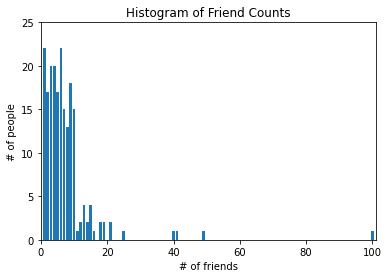

In [4]:

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]


from collections import Counter
import matplotlib.pyplot as plt

friend_counts = Counter(num_friends)
upper_X = int(max(num_friends) + 1)

xs = range(upper_X)                     # largest value is 100
ys = [friend_counts[x] for x in xs]     # height is just # of friends
upper_Y = max(ys) + 3
plt.bar(xs, ys)
plt.axis([0, upper_X, 0, upper_Y])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

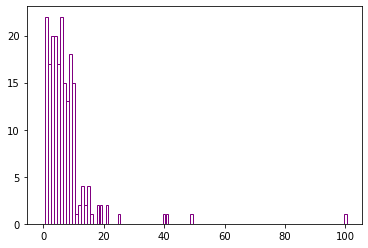

In [5]:
plt.bar(xs, ys,edgecolor='purple', color='None')
plt.show()

## Descriptive Statistic

The book shows ways to manual calculates descriptive statistics. Note that the ``linear_algebra.py`` from chapter four is copied to the note book directory.
* **ranking**: sorted data then extract the ranks  
* **`mean(data)`**   : summary of data divided by number of data  
* **`median(data)`** : the middle between max and min, the number or shape of data impacts directly this value such odd or even number of data  
* **`quatile(data,p)`**: devides data into 10 ranges, quatile 4 is equals to percentil 25 equlas to decentile 2.5. Argument `p` is the decentile  
* **`mode(data)`**   : the data points that most frequency
* **`data_range(data)`**  : the maximum minus minimum value  
* **`variance(data)`**: variacne, sum sqaure of each data and mean devid by number of data minus degree of freedom, mostly use  N-1
* **`standard_deviation(data)`**: root of variance
* **`interquartile_range`** : Range between Third Quatile and Second Quatile, represent the middile reange of data



In [6]:

num_points = len(num_friends)               # 204


assert num_points == 204

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1
range_value = largest_value - smallest_value


assert largest_value == 100
assert smallest_value == 1
assert range_value == 99

# ranking
sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49


assert smallest_value == 1
assert second_smallest_value == 1
assert second_largest_value == 49


from typing import List

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

mean(num_friends)   # 7.333333


assert 7.3333 < mean(num_friends) < 7.3334

# The underscores indicate that these are "private" functions, as they're
# intended to be called by our median function but not by other people
# using our statistics library.
def _median_odd(xs: List[float]) -> float:
    """If len(xs) is odd, the median is the middle element"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """If len(xs) is even, it's the average of the middle two elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2  # e.g. length 4 => hi_midpoint 2
    return (sorted_xs[hi_midpoint - 1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    """Finds the 'middle-most' value of v"""
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)

assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2


assert median(num_friends) == 6

def quantile(xs: List[float], p: float) -> float:
    """Returns the pth-percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

def mode(x: List[float]) -> List[float]:
    """Returns a list, since there might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}

# "range" already means something in Python, so we'll use a different name
def data_range(xs: List[float]) -> float:
    return max(xs) - min(xs)

assert data_range(num_friends) == 99

from linear_algebra import sum_of_squares

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

assert 81.54 < variance(num_friends) < 81.55

import math

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

assert 9.02 < standard_deviation(num_friends) < 9.04

def interquartile_range(xs: List[float]) -> float:
    """Returns the difference between the 75%-ile and the 25%-ile"""
    return quantile(xs, 0.75) - quantile(xs, 0.25)

assert interquartile_range(num_friends) == 6


### Demonstrate the statistics values
Let's try to use it and then represent it in the graph.


In [7]:
Ranges = data_range(num_friends)
Median = median(num_friends)
Mean = mean(num_friends)
_, Mode = mode(num_friends)
First_Quatile = quantile(num_friends,0.25)
Third_Quatile = quantile(num_friends,0.75)
IQR =interquartile_range(num_friends)
STD_DEV = standard_deviation(num_friends)
print(Third_Quatile -  First_Quatile,IQR)
print(STD_DEV)

6 6
9.03014473623248


Actually, data is not fit into normal distribution since the outline. Also, this chapter use ``list`` but some work seem too complicated, so I use numpy instead.

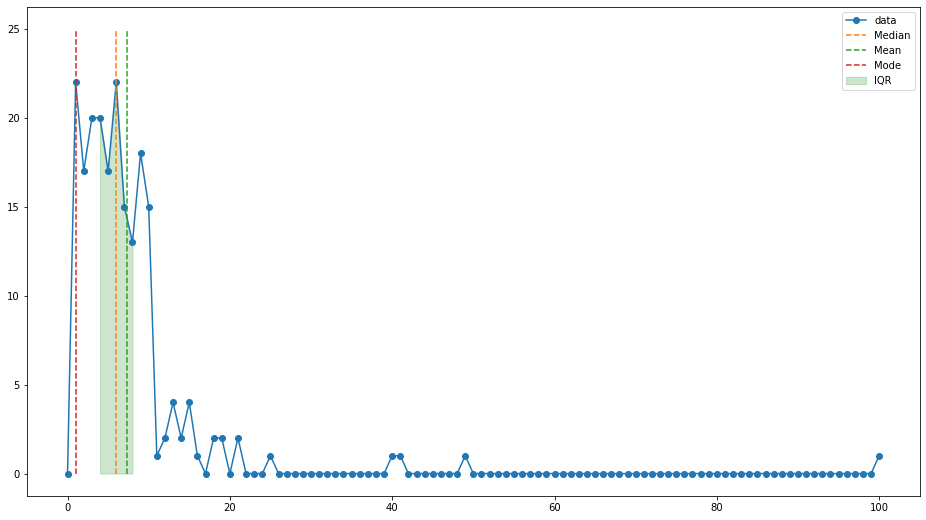

In [8]:
import numpy as np
x = np.array(xs)
y = np.array(ys)
plt.figure(figsize=(16,9))
plt.plot(x,y, 'o-',label='data')
plt.plot([Median,Median],[0,upper_Y],ls='--', label='Median')
plt.plot([Mean,Mean],[0,upper_Y],ls='--', label='Mean')
plt.plot([Mode,Mode],[0,upper_Y],ls='--', label='Mode')
plt.fill_between(x, y, 0, where =  (x>First_Quatile) & (x<Third_Quatile), color = "g", alpha = 0.2, label='IQR')
plt.legend()
plt.show()

### Remove the outlines
Let see the statistics values when remove some outlines  and then plot it again.

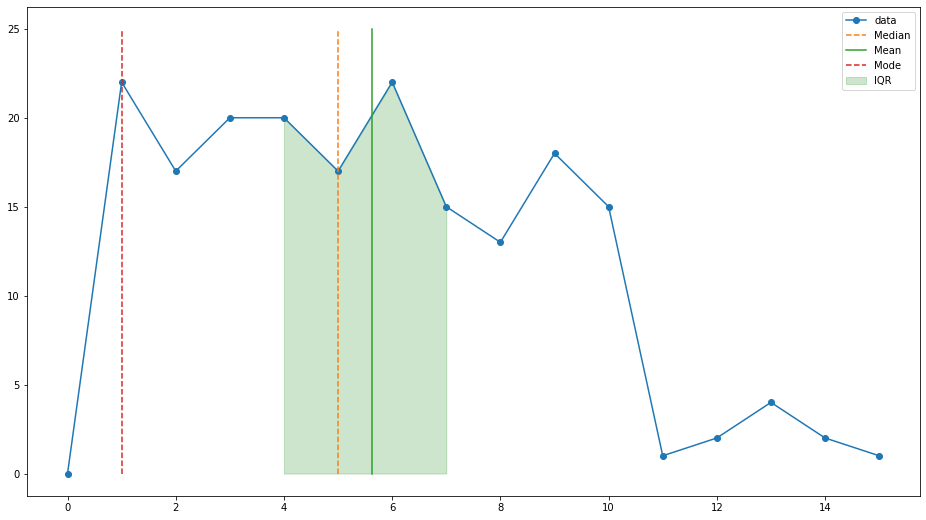

In [9]:
# delete 100.0,49,41,40, index is 0 to 3
Data = np.delete(np.array(num_friends),range(15))

friend_counts = Counter(Data)
upper_X = int(max(Data) + 1)
x = np.arange(upper_X)                     # largest value is 100
y = np.array([friend_counts[c] for c in x] )    # height is just # of friends
upper_Y = max(y) + 3

Ranges = data_range(Data)
Median = median(Data)
Mean = mean(Data)
_, Mode = mode(Data)
First_Quatile = quantile(Data,0.25)
Third_Quatile = quantile(Data,0.75)
IQR =interquartile_range(Data)
STD_DEV = standard_deviation(Data)

plt.figure(figsize=(16,9))
plt.plot(x,y, 'o-',label='data')
plt.plot([Median,Median],[0,upper_Y],ls='--', label='Median')
plt.plot([Mean,Mean],[0,upper_Y],ls='-', label='Mean')
plt.plot([Mode,Mode],[0,upper_Y],ls='--', label='Mode')
plt.fill_between(x, y, 0, where =  (x>First_Quatile) & (x<Third_Quatile), color = "g", alpha = 0.2, label='IQR')
plt.legend()
#plt.grid()
plt.show()

---

## Covariance and Correlation
Besides each individual avarage and disribution, we can see two dataset comparisision by Covariance and Correlation.
Let see the data from the book without remove any outline, the more number of friend may be more number hours online.

Data seems not growth in the same direction (blue data) that not in line with  the expected (orange)

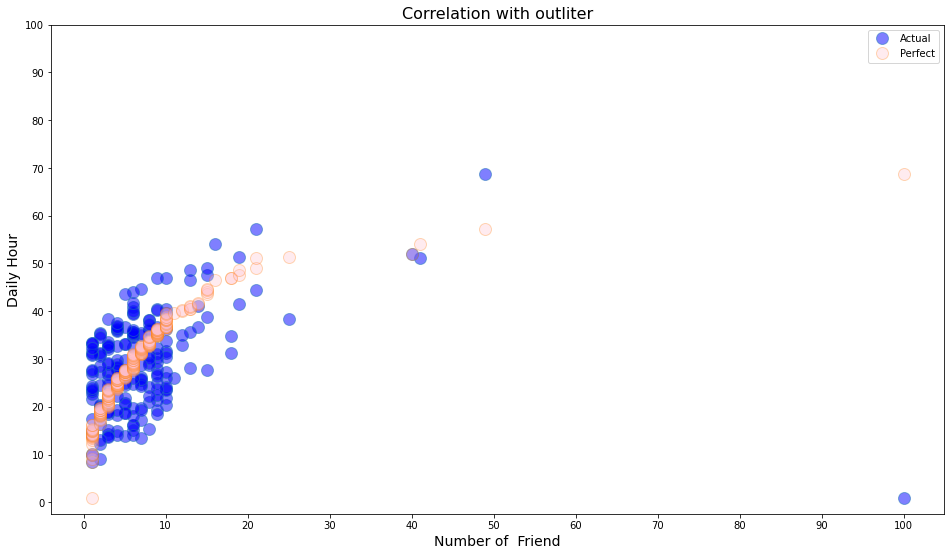

In [80]:

num_friends = [100.0,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,
               10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,
               9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,
               6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,
               4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,
               2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,
                 49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,
                 31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,
                 32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,
                 30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,
                 25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,
                 24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,
                 39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,
                 20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,
                 29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,
                 14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,
                 28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,
                 17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

daily_hours = [dm / 60 for dm in daily_minutes]


plt.figure(figsize=(16,9))
#plt.plot(num_friends,daily_hours,'kp',markerfacecolor='b',markersize=12)
plt.plot(num_friends,daily_minutes,'o',markerfacecolor='b',markersize=12, alpha=0.5, label='Actual')
plt.plot(sorted(num_friends),sorted(daily_minutes),'o',markerfacecolor='pink',markersize=12, alpha=0.3, label='Perfect')

plt.xlabel('Number of  Friend',fontsize=14)
plt.ylabel('Daily Hour',fontsize=14)
plt.title('Correlation with outliter', fontsize=16)
plt.xticks(range(0,110,10))
plt.yticks(range(0,110,10))
plt.legend()
plt.show()




The **Covariance** is compare variance the dataset, positive mean the value growth in the same direction while negative is in the opposite direction and value close to zero mean no siginficant. In general with N data set, the covariance can be compute from the covariance matrix

\begin{eqnarray*}
\text{Covariance Matrix:} \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1N} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2N} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{N1} \ \sigma_{N2} \ \dots \ \sigma_{NM}^2
    \end{bmatrix}
\end{eqnarray*}



In the case of Number of friend (x) and dialy minute (y) the covariance is:

\begin{equation}
\begin{aligned}
\text{Covariance}_{x,y} &= \vec{x} \cdot \vec{y} \\ \\
    &= \sum_{i=0}^{i=N} {x_i \cdot y_i} \\ \\
    &= \sum_{i=0}^{i=N} {\sigma_x \cdot \sigma_y} \\ \\
    &=  \large \sum_{i=0}^{i=N} { \frac{ (x_i -\bar{x})(y_i - \bar{y})}{N-1} }
\end{aligned}
\tag{Covariance}\label{Covairance}
\end{equation}

In [67]:
from linear_algebra import dot

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

assert 22.42 < covariance(num_friends, daily_minutes) < 22.43
assert 22.42 / 60 < covariance(num_friends, daily_hours) < 22.43 / 60


**Correlation** similar to the covariance but more stable.

\begin{equation}
\begin{aligned}
\text{Correlation}_{x,y} &= \frac{\vec{x} \cdot \vec{y}}{\sigma_x \sigma_y} \\ \\
    &= \sum_{i=0}^{i=N} \frac{x_i \cdot y_i}{\sigma_x \sigma_y} \\ \\
    &=  \large \frac{1}{N-1}\sum_{i=0}^{i=N} { \frac{ (x_i -\bar{x})(y_i - \bar{y})}{\sigma_x \sigma_y} }
\end{aligned}
\tag{Correlation}\label{Correlation}
\end{equation}

Coefficient of variance
\begin{equation}
\begin{aligned}
\text{Coefficient of Variation} = \frac{\sigma}{\bar{x}}    
\end{aligned}
\tag{Coefficient of Variation}\label{Coefficient of Variation}
\end{equation}

In [57]:
def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

assert 0.24 < correlation(num_friends, daily_minutes) < 0.25
assert 0.24 < correlation(num_friends, daily_hours) < 0.25

outlier = num_friends.index(100)    # index of outlier

num_friends_good = [x
                    for i, x in enumerate(num_friends)
                    if i != outlier]

daily_minutes_good = [x
                      for i, x in enumerate(daily_minutes)
                      if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

assert 0.57 < correlation(num_friends_good, daily_minutes_good) < 0.58
assert 0.57 < correlation(num_friends_good, daily_hours_good) < 0.58


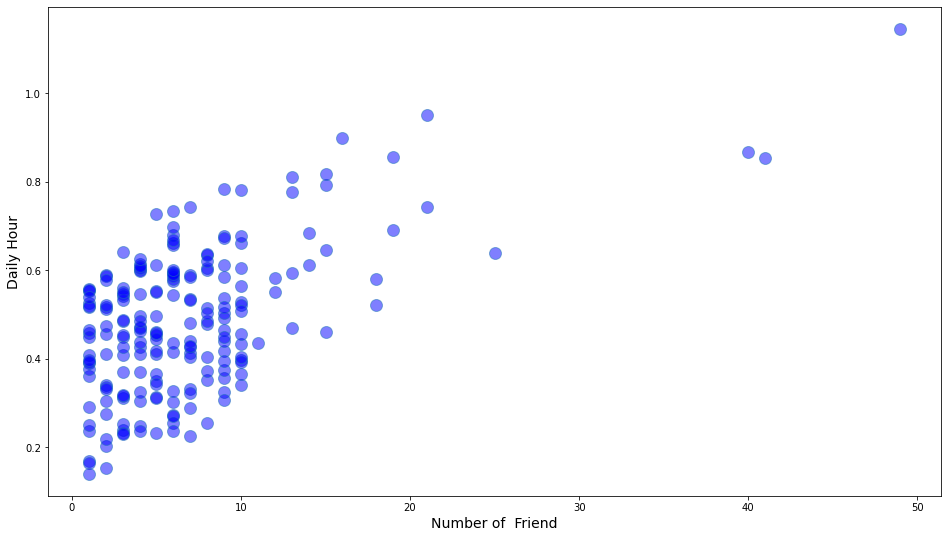

In [59]:
plt.figure(figsize=(16,9))
#plt.plot(num_friends,daily_hours,'kp',markerfacecolor='b',markersize=12)
#plt.plot(num_friends,daily_hours,'o',markerfacecolor='b',markersize=12, alpha=0.2, label='Actual')
plt.plot(num_friends_good,daily_hours_good,'o',markerfacecolor='b',markersize=12, alpha=0.5, label='Exoected')
#plt.plot(sorted(num_friends_good),sorted(daily_hours_good),'o',markerfacecolor='pink',markersize=12, alpha=0.8, label='Exoected')

plt.xlabel('Number of  Friend',fontsize=14)
plt.ylabel('Daily Hour',fontsize=14)
#plt.xticks([])
#plt.yticks([])
plt.show()
